In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [4]:
df=pd.read_csv("health.csv")

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [6]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1


In [7]:
df.info

<bound method DataFrame.info of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0                120          0.000           0.000                 0.000   
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerat

In [8]:
df.describe

<bound method NDFrame.describe of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0                120          0.000           0.000                 0.000   
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_deceler

In [9]:
df.shape

(2126, 22)

In [10]:
df.fetal_health.nunique

<bound method IndexOpsMixin.nunique of 0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64>

In [11]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
df.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


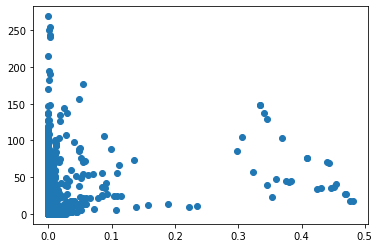

In [13]:
x=df.fetal_movement
y=df.histogram_variance
plt.scatter(x,y)
plt.show()

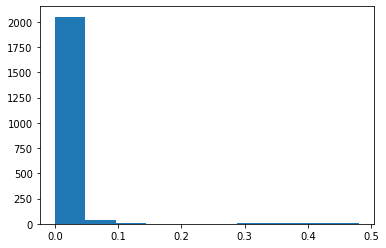

In [14]:
x=df.fetal_movement
plt.hist(x)
plt.show()


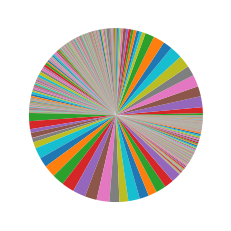

In [15]:
plt.pie(df.fetal_movement)
plt.show()

<ipython-input-16-89a02e6e8a4c>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x,y)


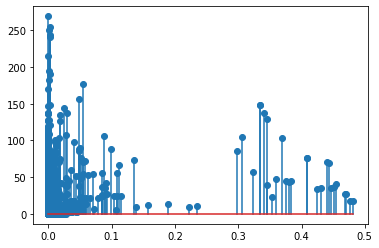

In [16]:
x=df.fetal_movement
y=df.histogram_variance
plt.stem(x,y)
plt.show()

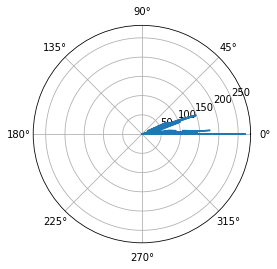

In [17]:
x=df.fetal_movement
y=df.histogram_variance
plt.polar(x,y)
plt.show()

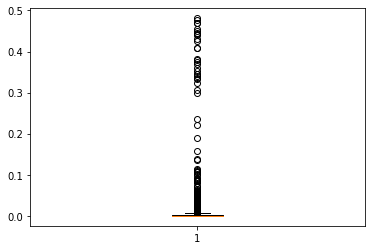

In [18]:
x=df.fetal_movement
plt.boxplot(x)
plt.show()

In [19]:
X = df.drop('fetal_health',axis = 1)
Y = df['fetal_health']

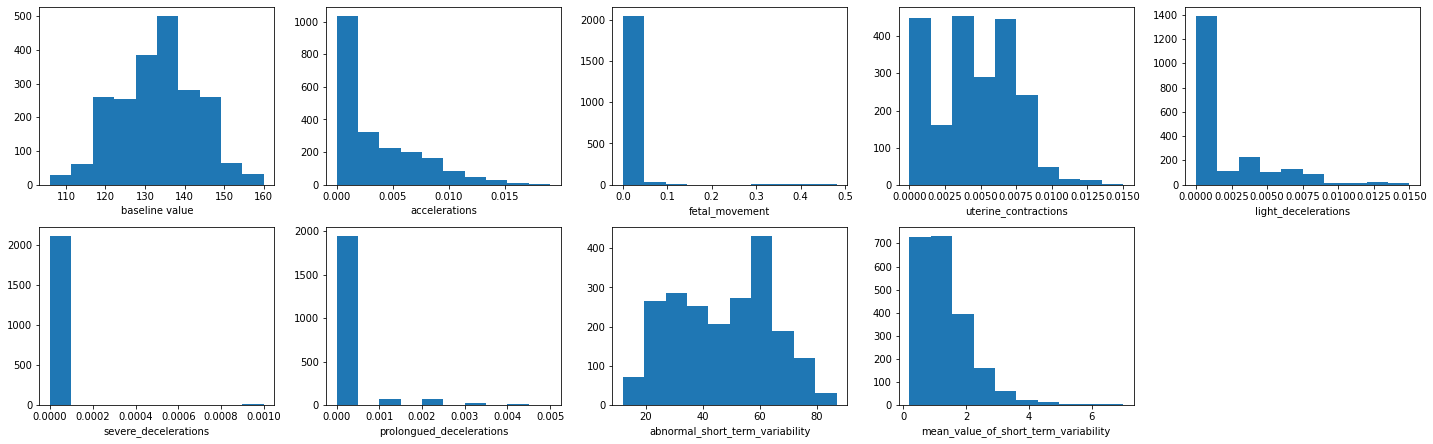

In [20]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    plt.hist(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

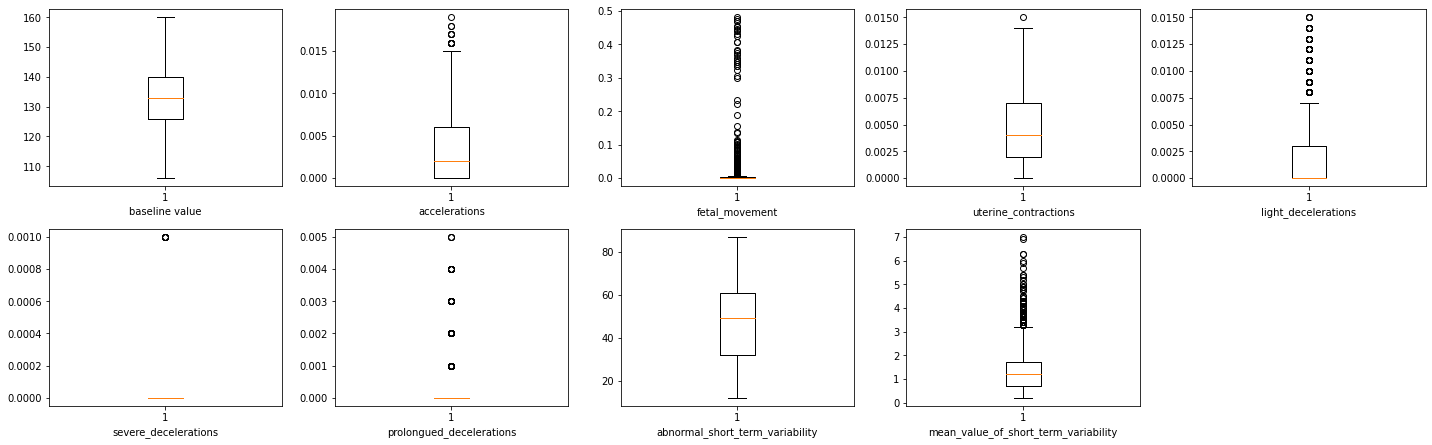

In [21]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    plt.boxplot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

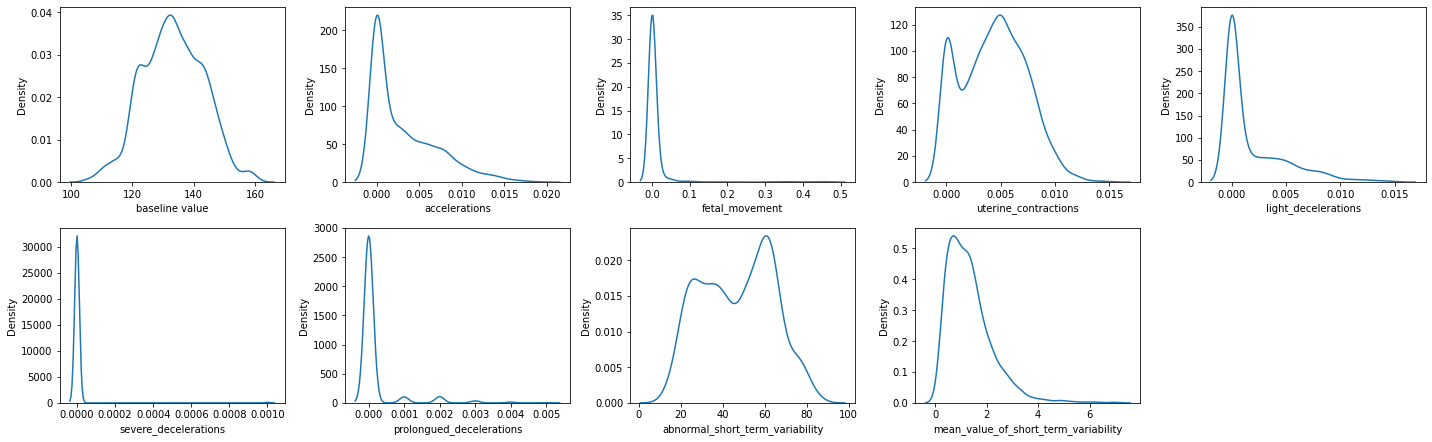

In [31]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    sns.kdeplot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

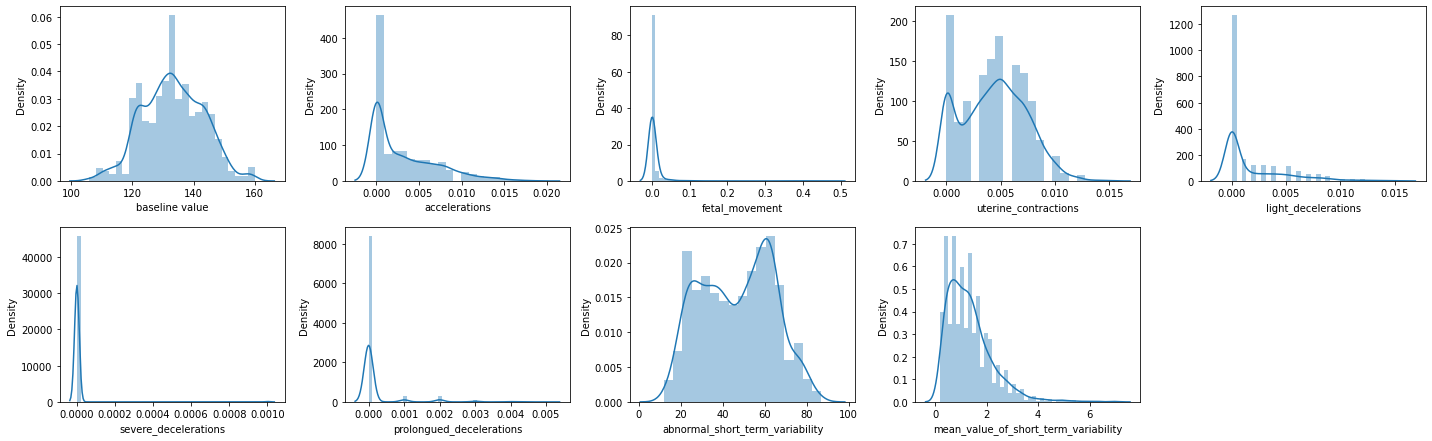

In [33]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    sns.distplot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

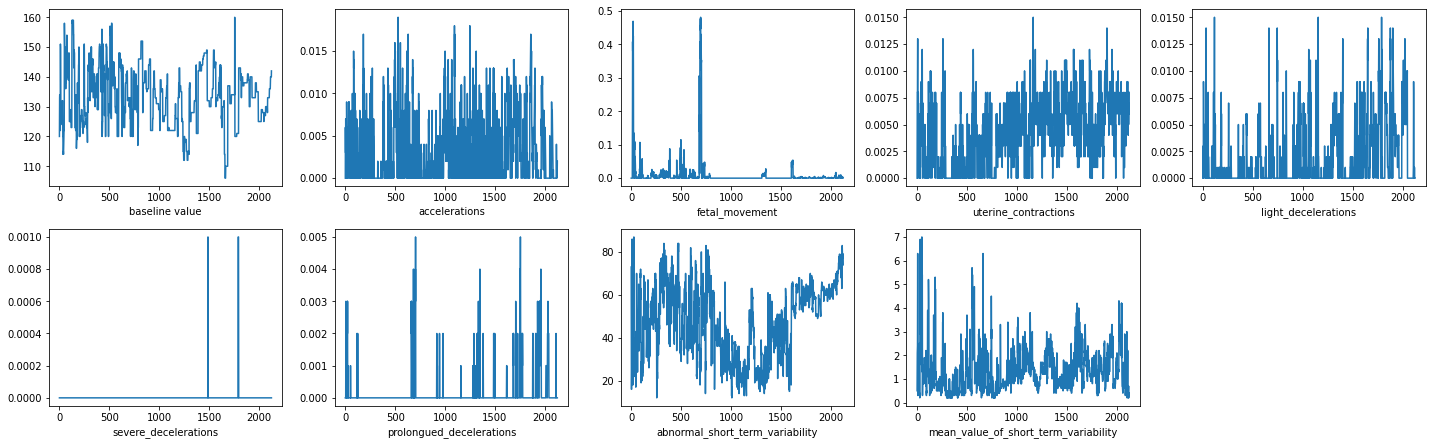

In [35]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    plt.plot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

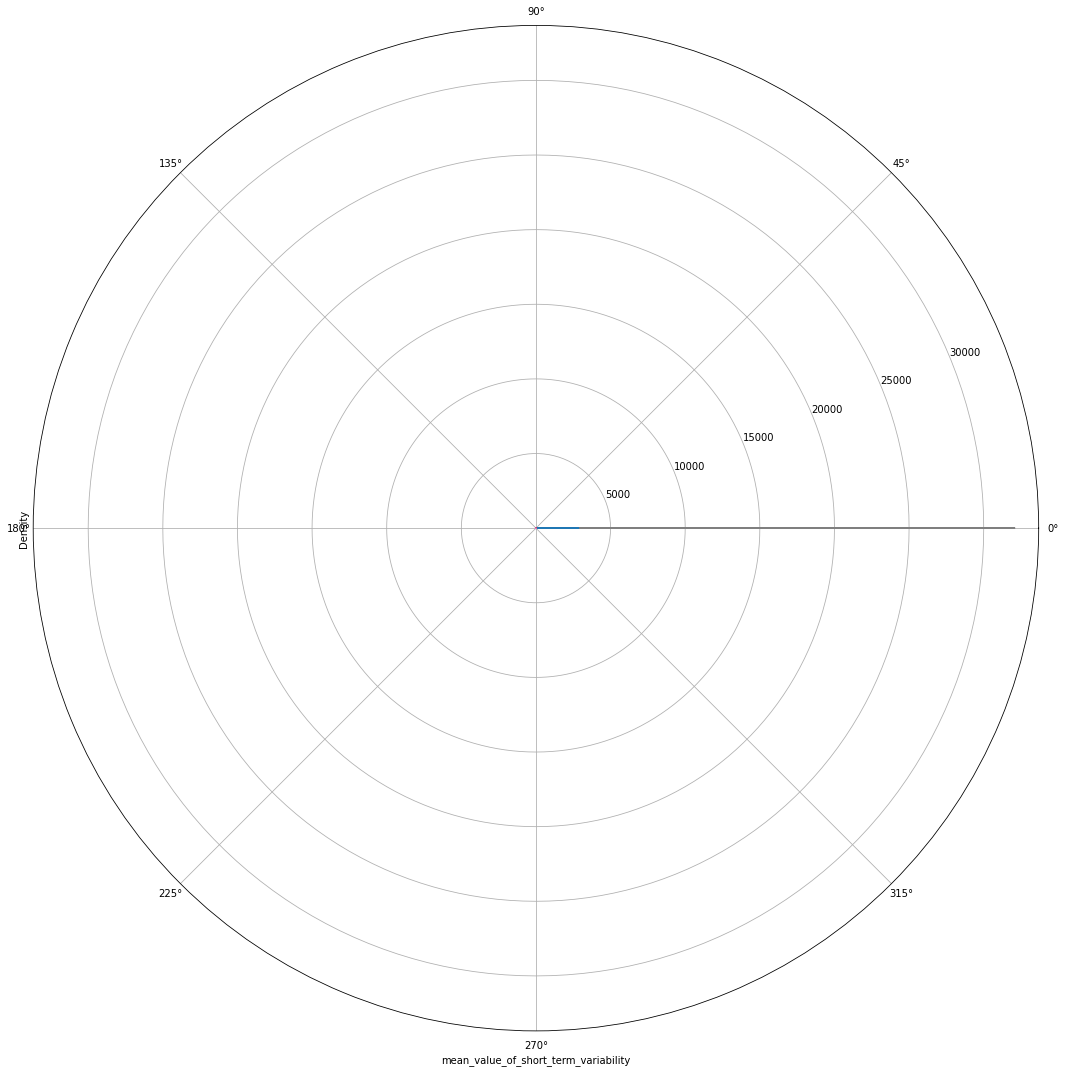

In [36]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.polar(5,5,plotnum)
    sns.kdeplot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

<ipython-input-37-1f3f7f424b2e>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(X[col])
<ipython-input-37-1f3f7f424b2e>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(X[col])
<ipython-input-37-1f3f7f424b2e>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_c

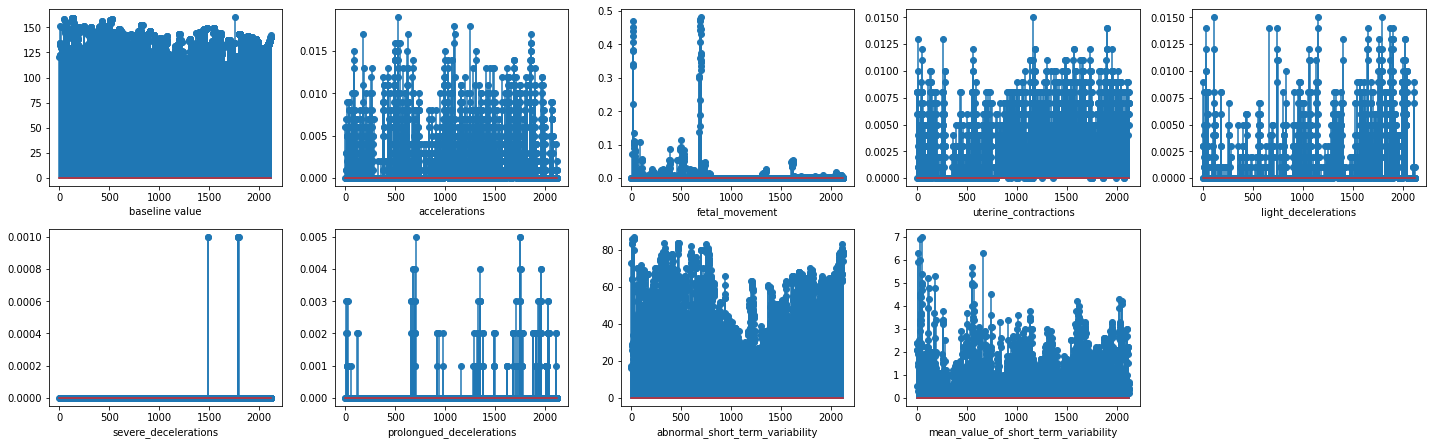

In [37]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    plt.stem(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

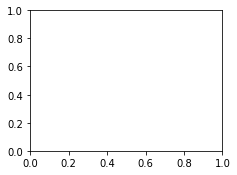

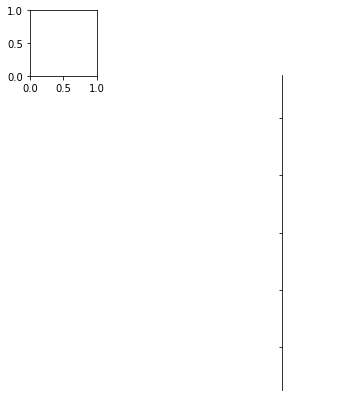

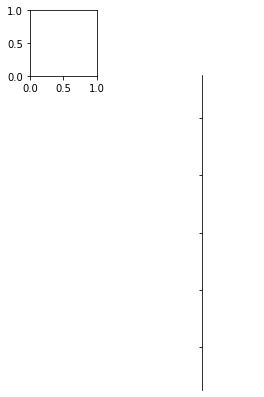

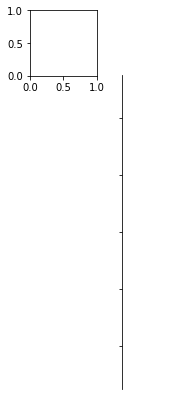

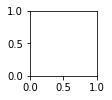

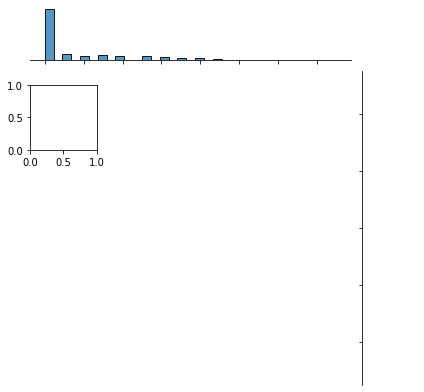

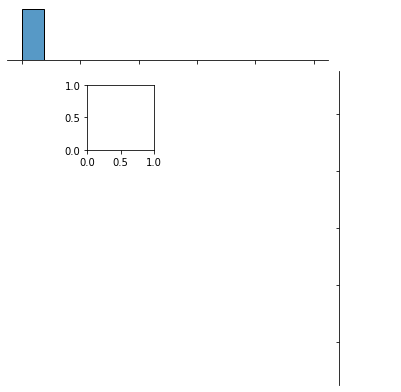

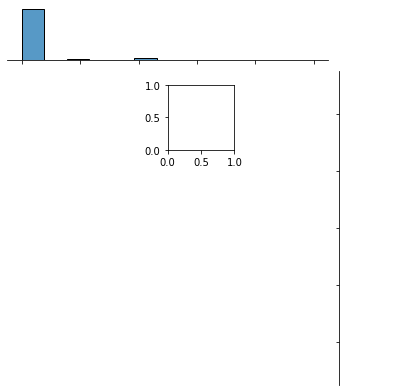

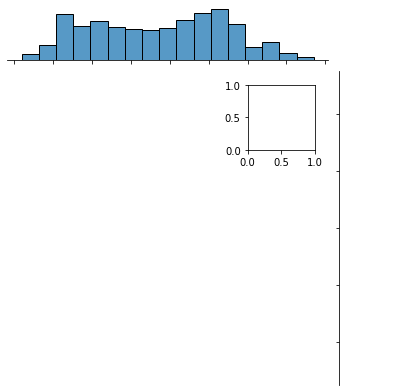

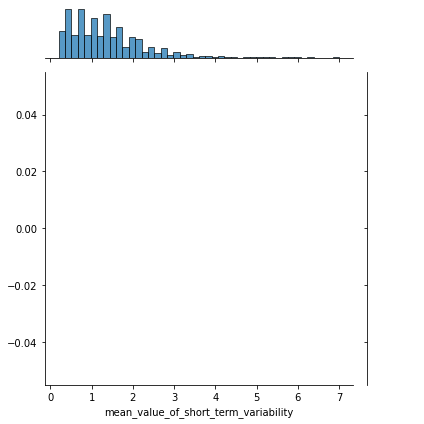

In [38]:
plt.figure(figsize=(20,15))
plotnum=1

for col in X.columns:
  if plotnum <=9:
    ax = plt.subplot(5,5,plotnum)
    sns.jointplot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.tight_layout()
plt.show()

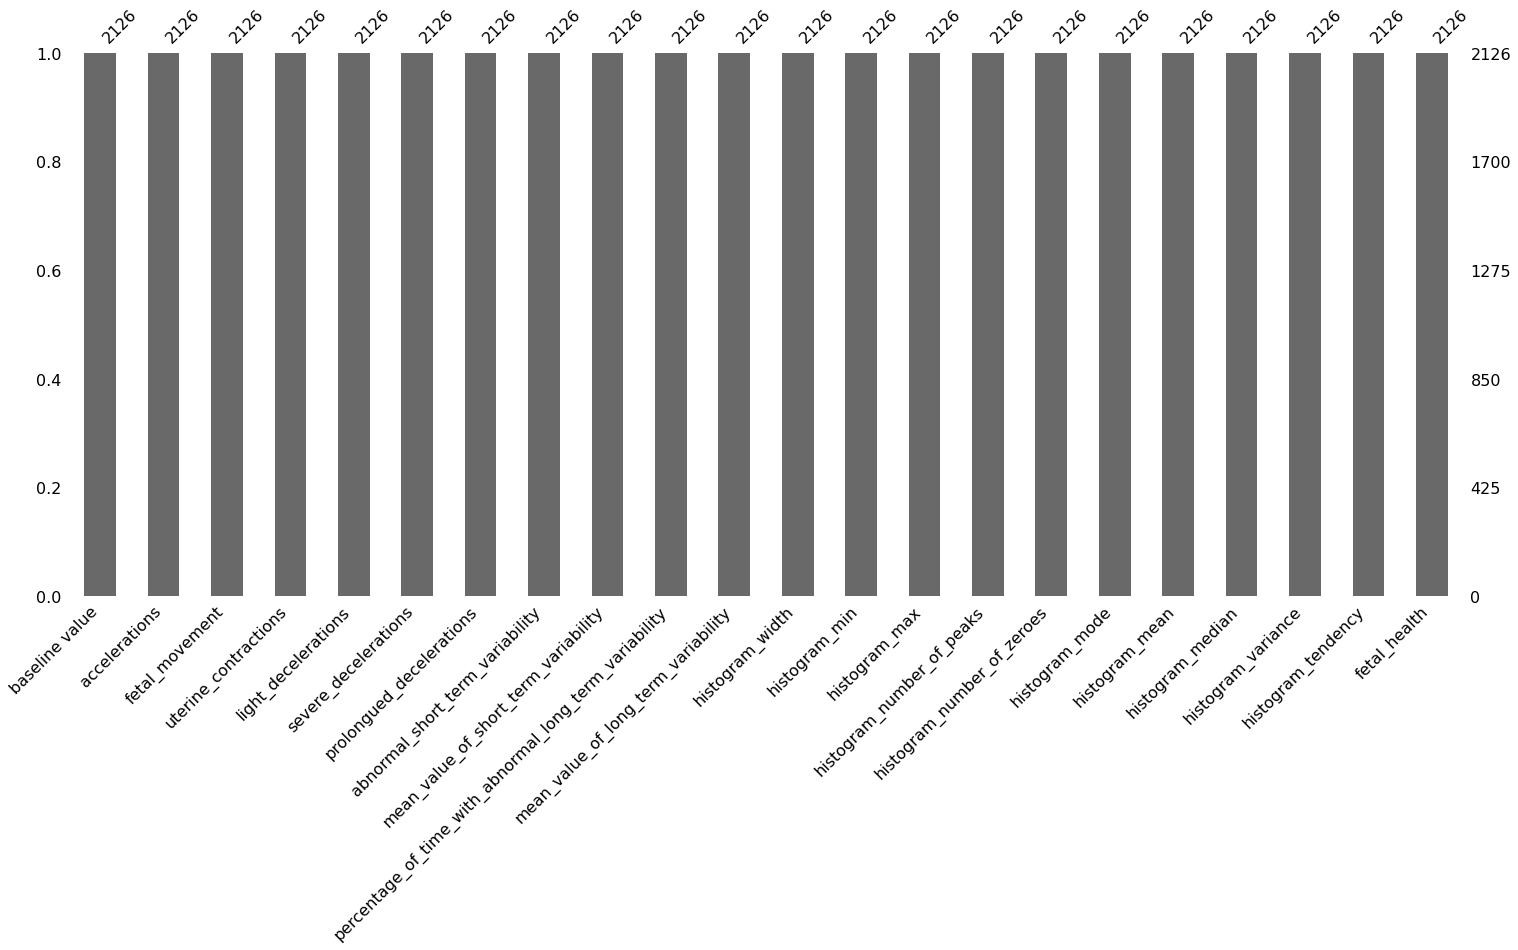

In [22]:
import missingno as msno

msno.bar(df)
plt.show()

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=0)

In [24]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.fit_transform(X_test)

In [25]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
Y_pred = clf.predict(X_test)

In [27]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[798,  26,   5],
       [ 41,  99,   9],
       [  6,   9,  70]])

In [28]:
accuracy_score(Y_test, Y_pred)

0.909689557855127

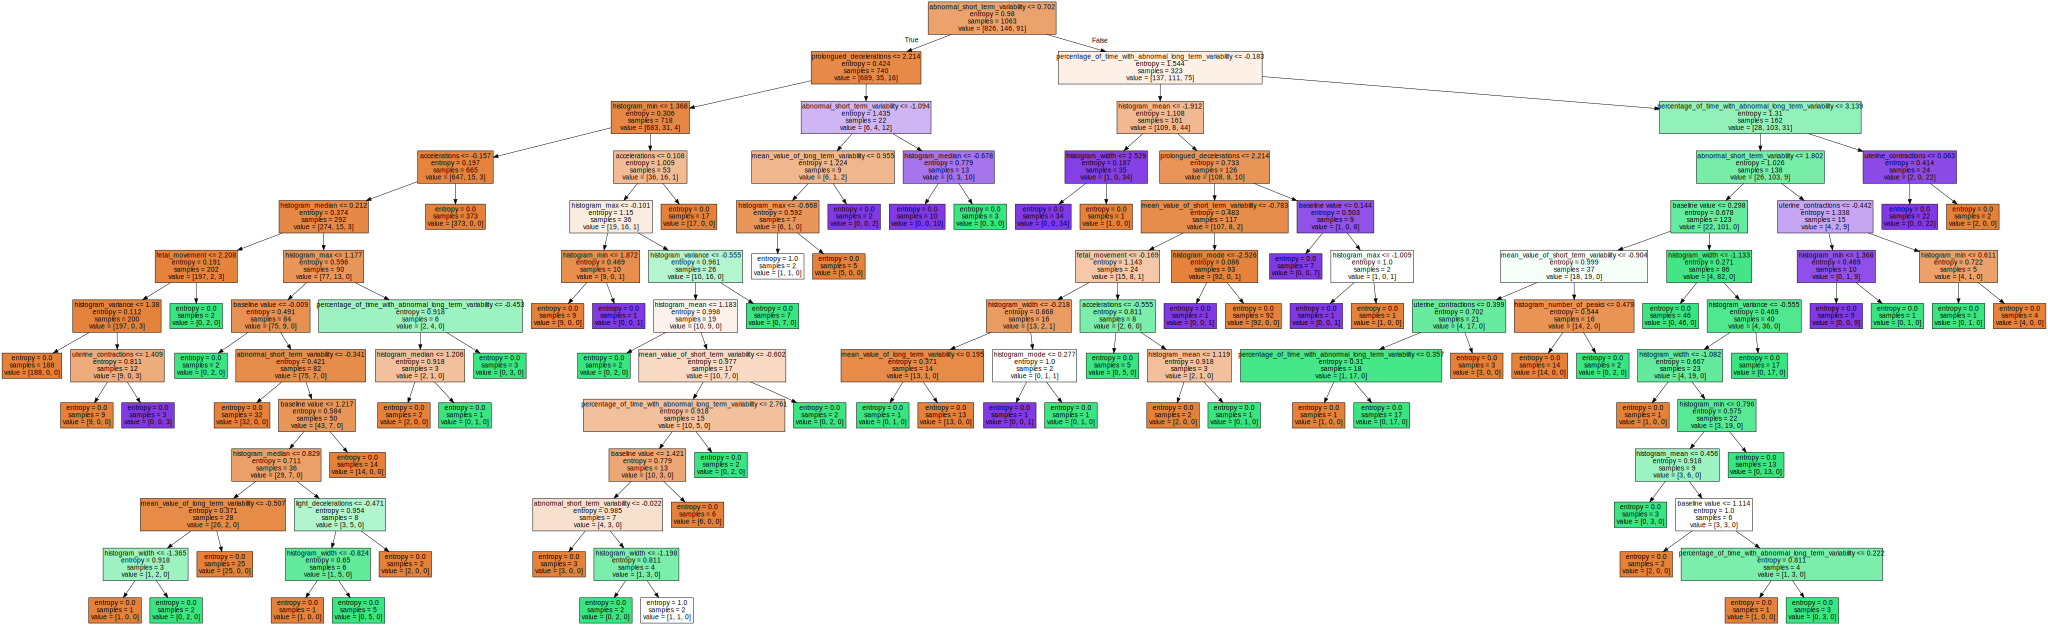

In [39]:
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))

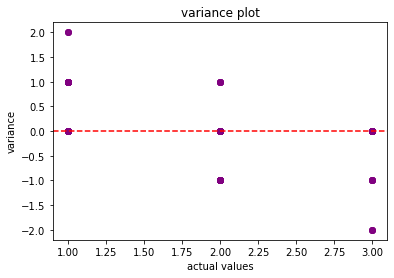

In [48]:
variance=Y_pred - Y_test
fig,ax=plt.subplots()
ax.scatter(Y_test,variance,color='purple',alpha=0.5)
ax.axhline(y=0, color='red',linestyle='--')
ax.set_xlabel("actual values")
ax.set_ylabel("variance")
ax.set_title("variance plot")
plt.show()

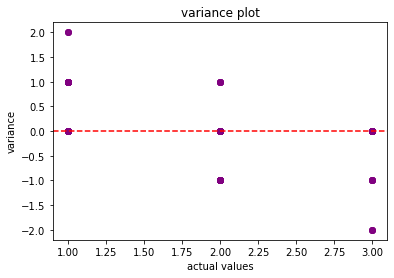

In [52]:
variance=Y_pred - Y_test
fig,ax=plt.subplots()
ax.scatter(Y_test,variance,color='purple',alpha=0.5)
ax.axhline(y=0, color='red',linestyle='--')
ax.set_xlabel("actual values")
ax.set_ylabel("variance")
ax.set_title("variance plot")
plt.show()